First, let's import our data and the modules we need <br> 
* ``numpy``, which serves as the fundamental library for array calculation.
* ``pandas``, which allows the processing of data sets in different formats, including csv.
* ``matplotlib`` and ``seaborn``, to create different graphs.
* ``scipy``, which will allow us to carry out statistical analysis more easily.
* ``scikit-learn`` for the Machine Learning part.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from IPython.display import display, Math, Latex

#Remove warnings
warnings.filterwarnings("ignore")

C:\Users\pauli\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\pauli\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\Users\pauli\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_csv("data\train_auto.csv")
df.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


# Data Analysis

Objectives:
* Take a closer look at the data
* Analyze the dependencies between the variables
* Process the data set

## First look at our data

We see that we have to modify some of our data.

We need to remove the dollars. Let's look at the columns INCOME. The majority of the data begin with a dollar, but some of them don't.

In [3]:
df.apply(lambda row : type(row['INCOME']),axis=1).value_counts()

<class 'str'>      7716
<class 'float'>     445
dtype: int64

In [4]:
df[df.INCOME.map(type) == float]['INCOME'].value_counts()

Series([], Name: INCOME, dtype: int64)

Those which don't begin with a dollar are `NaN`.

In [5]:
def from_dollar_string_to_float(row,column_name):
    if type(row[column_name])== str :
        return float(row[column_name][1:].replace(" ", "").replace(",",""))  
    else :
        return row[column_name]

for column_name in ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM'] :
    df[column_name]=df.apply(lambda row : from_dollar_string_to_float(row,column_name),axis=1)

del(column_name)

In [6]:
# statistiques sur les données numériques
df.describe()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
count,8161.000000,8161.000000,8161.000000,8161.000000,8155.000000,8161.000000,7707.000000,7716.000000,7697.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,7651.000000
mean,5151.867663,0.263816,1504.324648,0.171057,44.790313,0.721235,10.499286,61898.094609,154867.289723,33.485725,15709.899522,5.351305,4037.076216,0.798554,1.695503,8.328323
std,2978.893962,0.440728,4704.026930,0.511534,8.627589,1.116323,4.092474,47572.682808,129123.774574,15.908333,8419.734075,4.146635,8777.139104,1.158453,2.147112,5.700742
min,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,-3.000000
25%,2559.000000,0.000000,0.000000,0.000000,39.000000,0.000000,9.000000,28097.000000,0.000000,22.000000,9280.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,5133.000000,0.000000,0.000000,0.000000,45.000000,0.000000,11.000000,54028.000000,161160.000000,33.000000,14440.000000,4.000000,0.000000,0.000000,1.000000,8.000000
75%,7745.000000,1.000000,1036.000000,0.000000,51.000000,1.000000,13.000000,85986.000000,238724.000000,44.000000,20850.000000,7.000000,4636.000000,2.000000,3.000000,12.000000
max,10302.000000,1.000000,107586.136200,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,69740.000000,25.000000,57037.000000,5.000000,13.000000,28.000000


Let's look at string variables.

In [7]:
df['MSTATUS'].value_counts()

Yes     4894
z_No    3267
Name: MSTATUS, dtype: int64

In [8]:
df['SEX'].value_counts()

z_F    4375
M      3786
Name: SEX, dtype: int64

The "z_" is weird, lets' remove it. When we begin with Machine Learning, we will replace binary variables with 0 and 1. We keep it now for the further visualisation.

In [9]:
def remove_z(row,column_name):
    if type(row[column_name]) == str and row[column_name][:2] == "z_":
        return row[column_name][2:]
    return row[column_name]

for column_name in ['SEX','EDUCATION','MSTATUS','JOB','CAR_TYPE','URBANICITY']:
    df[column_name] = df.apply(lambda row : remove_z(row,column_name),axis=1)

del(column_name)

## Replace outliers or missing values

We are going to see that we have some missing values in our dataset, and some outliers.

In [10]:
df.describe()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
count,8161.000000,8161.000000,8161.000000,8161.000000,8155.000000,8161.000000,7707.000000,7716.000000,7697.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,7651.000000
mean,5151.867663,0.263816,1504.324648,0.171057,44.790313,0.721235,10.499286,61898.094609,154867.289723,33.485725,15709.899522,5.351305,4037.076216,0.798554,1.695503,8.328323
std,2978.893962,0.440728,4704.026930,0.511534,8.627589,1.116323,4.092474,47572.682808,129123.774574,15.908333,8419.734075,4.146635,8777.139104,1.158453,2.147112,5.700742
min,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,-3.000000
25%,2559.000000,0.000000,0.000000,0.000000,39.000000,0.000000,9.000000,28097.000000,0.000000,22.000000,9280.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,5133.000000,0.000000,0.000000,0.000000,45.000000,0.000000,11.000000,54028.000000,161160.000000,33.000000,14440.000000,4.000000,0.000000,0.000000,1.000000,8.000000
75%,7745.000000,1.000000,1036.000000,0.000000,51.000000,1.000000,13.000000,85986.000000,238724.000000,44.000000,20850.000000,7.000000,4636.000000,2.000000,3.000000,12.000000
max,10302.000000,1.000000,107586.136200,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,69740.000000,25.000000,57037.000000,5.000000,13.000000,28.000000


A car can't be -3 years old ! Let's replace outliers by NaN.

In [11]:
df[df['CAR_AGE']<0]['CAR_AGE']=np.nan

Let's see if we have a lot of NaN.

In [12]:
df.isna().sum()

INDEX            0
TARGET_FLAG      0
TARGET_AMT       0
KIDSDRIV         0
AGE              6
HOMEKIDS         0
YOJ            454
INCOME         445
PARENT1          0
HOME_VAL       464
MSTATUS          0
SEX              0
EDUCATION        0
JOB            526
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
CAR_AGE        510
URBANICITY       0
dtype: int64

We are going to use KNN-imputer to fill those missing values. In order to do this, we must drop 'INDEX' column which is not relevant at all, and 'TARGET_FLAG', 'TARGET_AMT' because we won't have access to it. We also need to HotEncode our categorical features, since KNN-imputer can't take it into account in this form.

In [13]:
columns_to_dummy = ['EDUCATION','CAR_TYPE','URBANICITY','JOB','CAR_USE']
columns_to_drop = ['INDEX','TARGET_FLAG','TARGET_AMT']

df_for_imputer = df.drop(columns=columns_to_drop)
df_for_imputer.replace({'Yes':1,'No':0,'M':1,'F':0,'yes':1,'no':0},inplace=True)
df_for_imputer = pd.get_dummies(df_for_imputer,columns=columns_to_dummy)

In [14]:
df_for_imputer.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,TRAVTIME,...,JOB_Blue Collar,JOB_Clerical,JOB_Doctor,JOB_Home Maker,JOB_Lawyer,JOB_Manager,JOB_Professional,JOB_Student,CAR_USE_Commercial,CAR_USE_Private
0,0,60.0,0,11.0,67349.0,0,0.0,0,1,14,...,0,0,0,0,0,0,1,0,0,1
1,0,43.0,0,11.0,91449.0,0,257252.0,0,1,22,...,1,0,0,0,0,0,0,0,1,0
2,0,35.0,1,10.0,16039.0,0,124191.0,1,0,5,...,0,1,0,0,0,0,0,0,0,1
3,0,51.0,0,14.0,NaN,0,306251.0,1,1,32,...,1,0,0,0,0,0,0,0,0,1
4,0,50.0,0,NaN,114986.0,0,243925.0,1,0,36,...,0,0,1,0,0,0,0,0,0,1


In [15]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
imputer.fit(df_for_imputer)
df_without_nan = pd.DataFrame(imputer.transform(df_for_imputer) ,columns=df_for_imputer.columns)

In [16]:
df_without_nan

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,TRAVTIME,...,JOB_Blue Collar,JOB_Clerical,JOB_Doctor,JOB_Home Maker,JOB_Lawyer,JOB_Manager,JOB_Professional,JOB_Student,CAR_USE_Commercial,CAR_USE_Private
0,0.0,60.0,0.0,11.0,67349.0,0.0,0.0,0.0,1.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,43.0,0.0,11.0,91449.0,0.0,257252.0,0.0,1.0,22.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,35.0,1.0,10.0,16039.0,0.0,124191.0,1.0,0.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,51.0,0.0,14.0,68559.4,0.0,306251.0,1.0,1.0,32.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,50.0,0.0,12.0,114986.0,0.0,243925.0,1.0,0.0,36.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8156,0.0,35.0,0.0,11.0,43112.0,0.0,0.0,0.0,1.0,51.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8157,1.0,45.0,2.0,9.0,164669.0,0.0,386273.0,1.0,1.0,21.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8158,0.0,46.0,0.0,9.0,107204.0,0.0,332591.0,1.0,1.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8159,0.0,50.0,0.0,7.0,43445.0,0.0,149248.0,1.0,0.0,36.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


We have our dataset without NaN. Let's categorize our categorical features.

In [17]:
df_clean = df_without_nan[df.drop(columns=columns_to_dummy+columns_to_drop).columns]

for column_name in columns_to_dummy :
    df_clean[column_name] = df_without_nan[df_without_nan.columns[np.char.startswith(list(df_without_nan.columns),column_name)]].idxmax(axis=1).apply(lambda x : x[len(column_name)+1:])

In [18]:
df_clean['TARGET_FLAG'] = df['TARGET_FLAG']
df_clean.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,TRAVTIME,...,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,EDUCATION,CAR_TYPE,URBANICITY,JOB,CAR_USE,TARGET_FLAG
0,0.0,60.0,0.0,11.0,67349.0,0.0,0.0,0.0,1.0,14.0,...,2.0,0.0,3.0,18.0,PhD,Minivan,Highly Urban/ Urban,Professional,Private,0
1,0.0,43.0,0.0,11.0,91449.0,0.0,257252.0,0.0,1.0,22.0,...,0.0,0.0,0.0,1.0,High School,Minivan,Highly Urban/ Urban,Blue Collar,Commercial,0
2,0.0,35.0,1.0,10.0,16039.0,0.0,124191.0,1.0,0.0,5.0,...,2.0,0.0,3.0,10.0,High School,SUV,Highly Urban/ Urban,Clerical,Private,0
3,0.0,51.0,0.0,14.0,68559.4,0.0,306251.0,1.0,1.0,32.0,...,0.0,0.0,0.0,6.0,<High School,Minivan,Highly Urban/ Urban,Blue Collar,Private,0
4,0.0,50.0,0.0,12.0,114986.0,0.0,243925.0,1.0,0.0,36.0,...,2.0,1.0,3.0,17.0,PhD,SUV,Highly Urban/ Urban,Doctor,Private,0


We have a clean dataset ! Now we can visualize our data properly.

## Data Visualisation

First, let's see who are our clients.

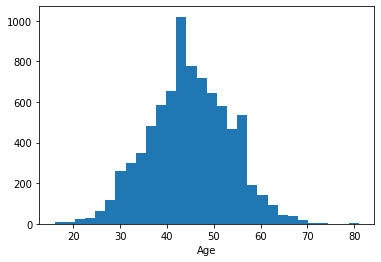

In [19]:
plt.hist(df_clean['AGE'],bins=30)
plt.xlabel('Age');

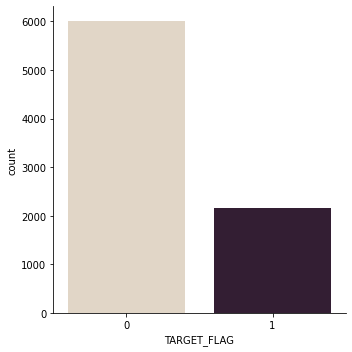

In [20]:
sns.catplot(x="TARGET_FLAG", kind="count", palette="ch:.25",aspect=1, data=df_clean);

Our variables are umbalanced, we will age to take that into account in the Machine Learning part.

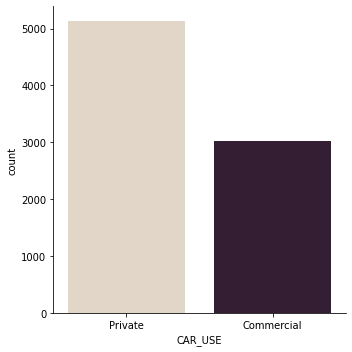

In [21]:
sns.catplot(x="CAR_USE", kind="count", palette="ch:.25",aspect=1, data=df_clean);

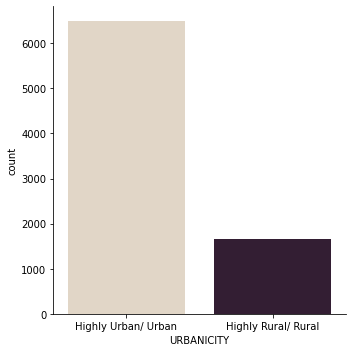

In [22]:
sns.catplot(x="URBANICITY", kind="count", palette="ch:.25",aspect=1, data=df_clean);

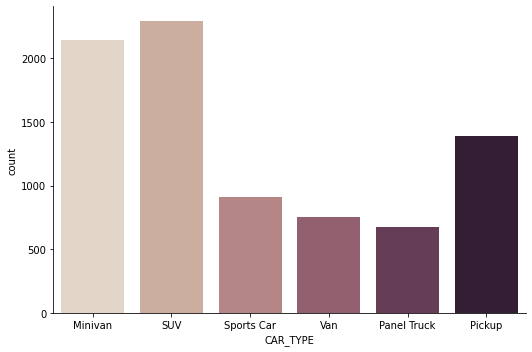

In [23]:
sns.catplot(x="CAR_TYPE", kind="count", palette="ch:.25",aspect=1.5, data=df_clean);

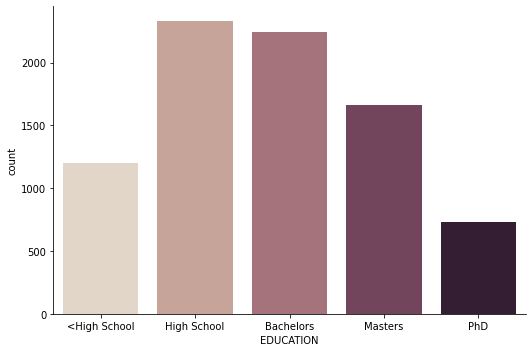

In [24]:
sns.catplot(x="EDUCATION", kind="count", palette="ch:.25",aspect=1.5, data=df_clean, order=['<High School','High School','Bachelors','Masters','PhD']);

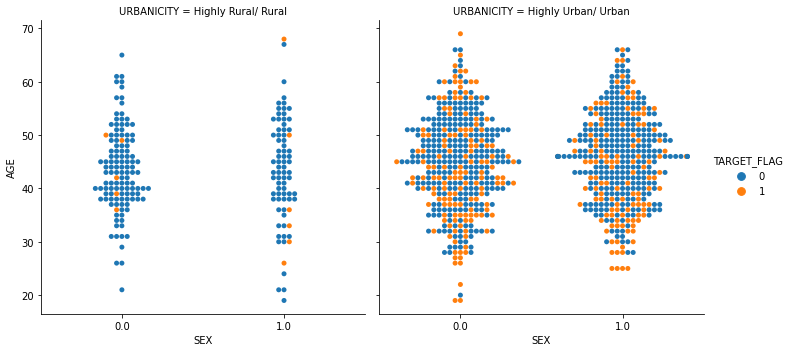

In [25]:
sns.catplot(col="URBANICITY",y="AGE", hue="TARGET_FLAG",x="SEX", kind="swarm", data=df_clean.sample(1000));

In the city the target flag is relatively more frequent, this variable will be more important. There is no distinction between sexes, so we can think about dropping this variable, all the more so as it is not ethical to keep it. The more one is young, the more he/she is succeptible to be targeted : this variable will be important.

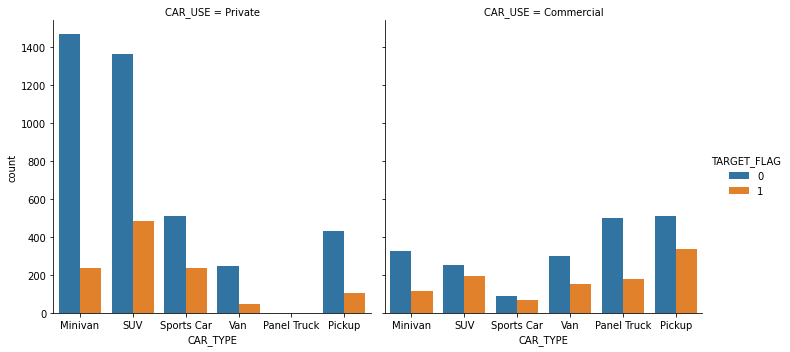

In [26]:
sns.catplot(x="CAR_TYPE",hue="TARGET_FLAG",col="CAR_USE",kind="count",data=df_clean);

There are more probability of being flagged if we have a commercial car, especially if we have a Sports Car, a SUV or a Pickup. Those information are going to be important, we can create a feature for those type of cars.

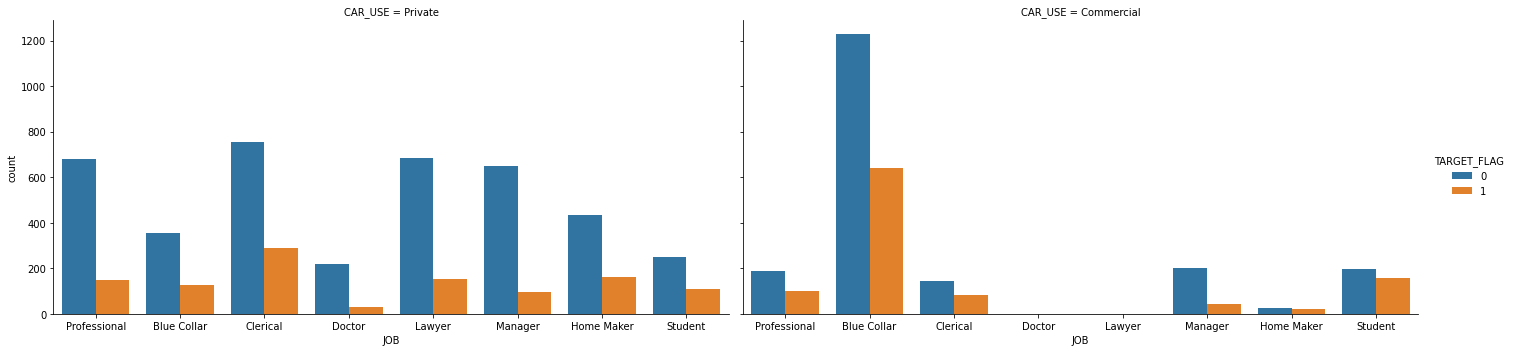

In [27]:
sns.catplot(col='CAR_USE',hue="TARGET_FLAG",x="JOB",kind="count",data=df_clean,aspect=2);

We have a lot of target flags in Blue Collar, Student and Clerical. Maybe we could do clustering to only one variable about job, representing how much the job is susceptible to get target.

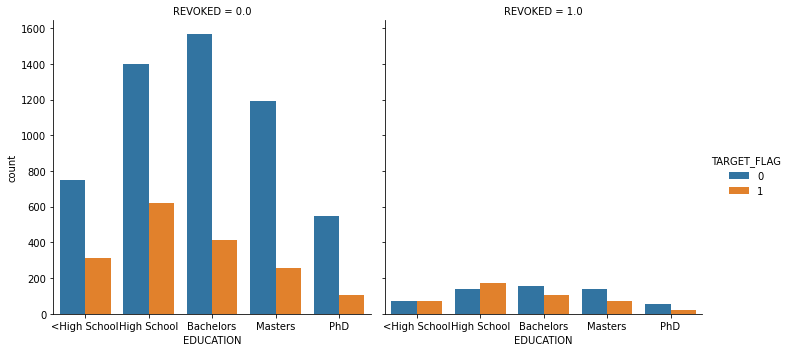

In [28]:
sns.catplot(col='REVOKED',hue="TARGET_FLAG",x="EDUCATION",kind="count",data=df_clean,aspect=1,order=['<High School','High School','Bachelors','Masters','PhD']);

The revoked variable is very important : we see that a high proportion of revoked are targeted, excepted for PhDs, and that otherwise the level of education doesn't play a huge role. We can transform the feature "EDUCATION" into a feature "dangerousity of education" equal to the proportion of targeted in my education if revoked=0.0.

In [29]:
df_clean_education = pd.concat([ df_clean[['EDUCATION','TARGET_FLAG']] , pd.DataFrame(np.ones(len(df_clean),dtype=int),columns=['TOTAL'])],axis=1)
display(df_clean_education.groupby('EDUCATION').sum())
dico_education = dict(df_clean_education.groupby('EDUCATION').sum().apply(lambda row : row.TARGET_FLAG / row.TOTAL, axis=1))
dico_education

,TARGET_FLAG,TOTAL
EDUCATION,,
<High School,385,1203
Bachelors,523,2242
High School,793,2330
Masters,327,1658
PhD,125,728


{'<High School': 0.3200332502078138,
 'Bachelors': 0.23327386262265834,
 'High School': 0.340343347639485,
 'Masters': 0.19722557297949336,
 'PhD': 0.1717032967032967}

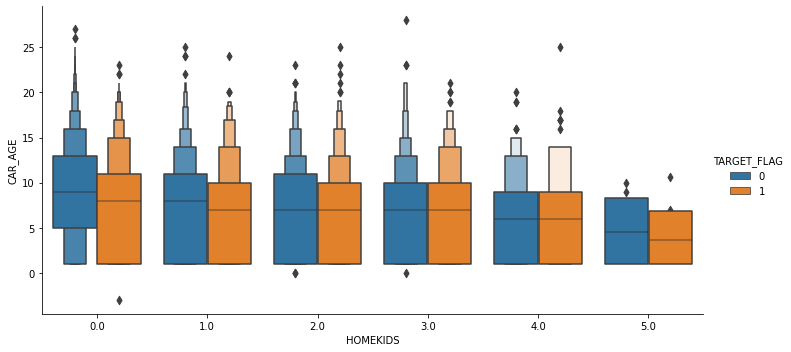

In [30]:
sns.catplot(x="HOMEKIDS", y="CAR_AGE", kind="boxen",aspect=2, hue="TARGET_FLAG",data=df_clean);

Neither the car age nor the homekids seem to play an important role.

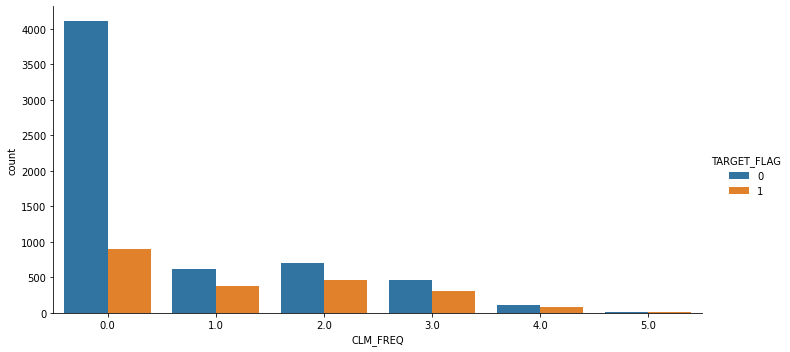

In [31]:
sns.catplot(x="CLM_FREQ", kind="count",aspect=2, hue="TARGET_FLAG",data=df_clean);

The more one has claimed, the more they will be targeted.

Let's see the correlations between our features.

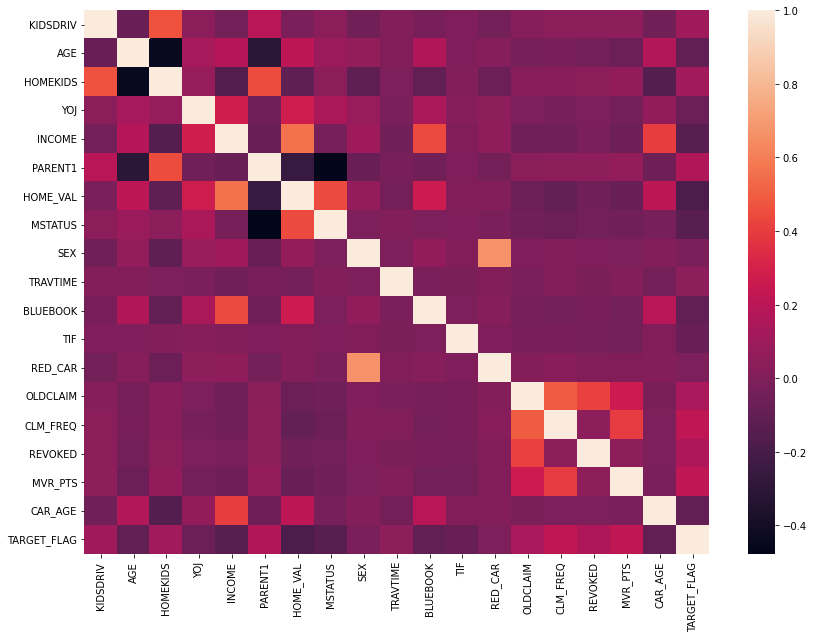

In [32]:
plt.figure(figsize=(14,10))
sns.heatmap(df_clean.corr());

We can observe the correlation of the variables with the TARGET_FLAG.

HOME_VAL, INCOME and BLUEBOOK are highly correlated, so we can keep only one of them. Same for OLDCLAIM and CLM_FREQ, and KIDSDRIV and HOMEKIDS.

We see that the variables RED_CAR and SEX are correlated, and the RED_CAR variable shouldn't play a role, so we are going to drop this variable...

## Feature Engineering

In [33]:
def data_for_ml(data):
    
    dataset = data.copy()
    # removing some features
    try :
        dataset.drop(columns=['TARGET_AMT','TARGET_FLAG'],inplace=True)
        dataset.drop(columns=['INDEX'],inplace=True)
    except :pass
    dataset.drop(columns=['SEX','RED_CAR','OLDCLAIM','KIDSDRIV'],inplace=True)

    # remove the "z_"
    for column_name in ['EDUCATION','MSTATUS','JOB','CAR_TYPE','URBANICITY']:
        dataset[column_name] = dataset.apply(lambda row : remove_z(row,column_name),axis=1)
    del(column_name)

    # remove the "$" from income, remove silimar features of income
    dataset.drop(columns=['HOME_VAL','BLUEBOOK'],inplace=True)
    dataset['INCOME'] = dataset.apply(lambda row : from_dollar_string_to_float(row,'INCOME'),axis=1)

    # make binary variables
    dataset.replace({'Yes':1,'No':0,'M':1,'F':0,'yes':1,'no':0},inplace=True)
    dataset['CAR_USE'] = dataset['CAR_USE'].replace({'Private':0,'Commercial':1})
    dataset['URBANICITY'] = dataset['URBANICITY'].replace({'Highly Rural/ Rural':0,'Highly Urban/ Urban':1})

    # create features 
    dataset['EDUCATION'] = dataset.apply( lambda row : dico_education[row.EDUCATION], axis=1 )
    dataset['CAR_TYPE_DANGEROUS'] = dataset.apply(lambda row : 1 if row.CAR_TYPE in ['SUV','Sports Car','Pickup'] else 0,axis=1)
    dataset['JOB_DANGEROUS'] = dataset.apply(lambda row : 1 if row.JOB in ['Blue Collar','Student','Clerical'] else 0,axis=1)
    dataset.drop(columns=['CAR_TYPE','JOB'],inplace=True)
    
    return dataset

In [34]:
df_clean.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,TRAVTIME,...,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,EDUCATION,CAR_TYPE,URBANICITY,JOB,CAR_USE,TARGET_FLAG
0,0.0,60.0,0.0,11.0,67349.0,0.0,0.0,0.0,1.0,14.0,...,2.0,0.0,3.0,18.0,PhD,Minivan,Highly Urban/ Urban,Professional,Private,0
1,0.0,43.0,0.0,11.0,91449.0,0.0,257252.0,0.0,1.0,22.0,...,0.0,0.0,0.0,1.0,High School,Minivan,Highly Urban/ Urban,Blue Collar,Commercial,0
2,0.0,35.0,1.0,10.0,16039.0,0.0,124191.0,1.0,0.0,5.0,...,2.0,0.0,3.0,10.0,High School,SUV,Highly Urban/ Urban,Clerical,Private,0
3,0.0,51.0,0.0,14.0,68559.4,0.0,306251.0,1.0,1.0,32.0,...,0.0,0.0,0.0,6.0,<High School,Minivan,Highly Urban/ Urban,Blue Collar,Private,0
4,0.0,50.0,0.0,12.0,114986.0,0.0,243925.0,1.0,0.0,36.0,...,2.0,1.0,3.0,17.0,PhD,SUV,Highly Urban/ Urban,Doctor,Private,0


# Machine Learning

## Prepare training and validation data

In [35]:
X = data_for_ml(df_clean).drop(columns=['TARGET_FLAG'])
y = data_for_ml(df_clean)['TARGET_FLAG']

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

Stratification makes validation data with the same distribution of labels as the training data.

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.2, stratify=y)

## Choose, train and evaluate model

Déjà, définissons une fonction qui donne le score d'un modèle. <br> 
Pour la classification, on définit 4 taux statistiques.

In [38]:
pd.DataFrame({'Positive':['True Positive (TP)','False Negative (FN)'],'Negative':['True Negative (TN)','False Positive (FP)'],'Predicted':['Positive','Negative']},index=['Positive','Negative']).set_index('Predicted')

,Positive,Negative
Predicted,,
Positive,True Positive (TP),True Negative (TN)
Negative,False Negative (FN),False Positive (FP)


We also define 4 metrics to evaluate the chosen model.
$$ Accuracy = \frac{TP+TF}{TP+TF+FP+FN}$$
$$ Precision = \frac{TP}{TP+FP} $$
$$ Recall = \frac{TP}{TP+FN} $$
$$ F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN} $$

In our case, we'd like to have the less False Negative posible.

In [39]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

def score(X_train,X_test,y_train, y_test,model):
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  accuracy_train = accuracy_score(y_train,y_pred_train)
  accuracy_test = accuracy_score(y_test,y_pred_test)

  recall_train = recall_score(y_train,y_pred_train)
  recall_test = recall_score(y_test,y_pred_test)

  precision_train = precision_score(y_train,y_pred_train)
  precision_test = precision_score(y_test,y_pred_test)

  f1_train = f1_score(y_train,y_pred_train)
  f1_test = f1_score(y_test,y_pred_test)

  print("Accuracy on training set:", accuracy_train)
  print("Accuracy on validation set:", accuracy_test)
  print("-----------------------")
  print("Recall on training set:", recall_train)
  print("Recall on validation set:", recall_test)
  print("-----------------------")
  print("Precision on training set:", precision_train)
  print("Precision on validation set:", precision_test)
  print("-----------------------")
  print("F1-score on training set:", f1_train)
  print("F1-score on validation set:", f1_test)

  disp = ConfusionMatrixDisplay(confusion_matrix(y_test,model.predict(X_test)))
  disp.plot()
  plt.show()

Accuracy on training set: 0.7844669117647058
Accuracy on validation set: 0.7881200244947949
-----------------------
Recall on training set: 0.3879210220673635
Recall on validation set: 0.39443155452436196
-----------------------
Precision on training set: 0.6542605288932419
Precision on validation set: 0.6666666666666666
-----------------------
F1-score on training set: 0.4870579657309515
F1-score on validation set: 0.4956268221574345


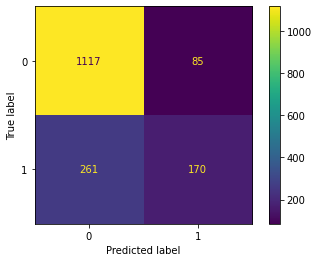

In [40]:
from sklearn.linear_model import LogisticRegression

reglog = LogisticRegression()
reglog.fit(X_train, y_train)
score(X_train, X_val, y_train, y_val, reglog)

There is underfitting

Accuracy on training set: 0.8253676470588235
Accuracy on validation set: 0.7605633802816901
-----------------------
Recall on training set: 0.5272938443670151
Recall on validation set: 0.41531322505800466
-----------------------
Precision on training set: 0.7358184764991896
Precision on validation set: 0.5628930817610063
-----------------------
F1-score on training set: 0.6143437077131259
F1-score on validation set: 0.4779706275033378


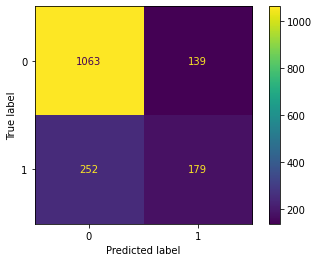

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score(X_train, X_val, y_train, y_val, knn)

{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Accuracy on training set: 0.8468137254901961
Accuracy on validation set: 0.7893447642375995
-----------------------
Recall on training set: 0.4732868757259001
Recall on validation set: 0.33642691415313225
-----------------------
Precision on training set: 0.8975770925110133
Precision on validation set: 0.7142857142857143
-----------------------
F1-score on training set: 0.6197718631178707
F1-score on validation set: 0.45741324921135645


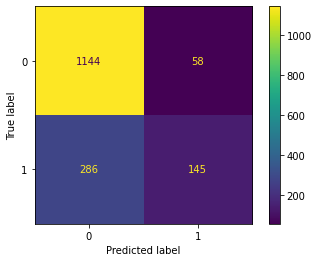

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
#n_estimators = 100,max_features ='log2' ,class_weight='balanced_subsample'

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

grid_cv_clf = GridSearchCV(clf, param_grid, scoring="roc_auc", n_jobs=-1, cv=5).fit(X_train, y_train)
print(grid_cv_clf.best_params_)
score(X_train, X_val, y_train, y_val, grid_cv_clf)

There is overfitting

Accuracy on training set: 0.7832414215686274
Accuracy on validation set: 0.7844458052663809
-----------------------
Recall on training set: 0.3548199767711963
Recall on validation set: 0.35730858468677495
-----------------------
Precision on training set: 0.66775956284153
Precision on validation set: 0.6724890829694323
-----------------------
F1-score on training set: 0.4634053849070914
F1-score on validation set: 0.4666666666666667


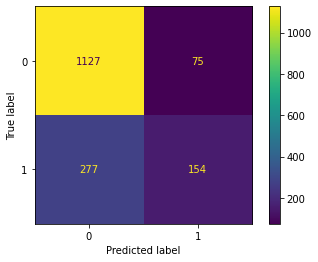

In [43]:
from sklearn.svm import LinearSVC 

lsvc = LinearSVC()
lsvc.fit(X_train,y_train)
score(X_train, X_val, y_train, y_val, lsvc)

There is underfitting...

{'C': 1, 'gamma': 0.01}
Accuracy on training set: 0.7003676470588235
Accuracy on validation set: 0.6968769136558481
-----------------------
Recall on training set: 0.8002322880371661
Recall on validation set: 0.7842227378190255
-----------------------
Precision on training set: 0.4608695652173913
Precision on validation set: 0.45675675675675675
-----------------------
F1-score on training set: 0.5848896434634976
F1-score on validation set: 0.5772843723313407


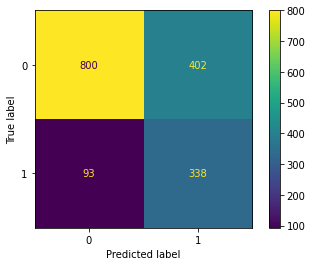

In [44]:
from sklearn.svm import SVC 

svc = SVC(class_weight='balanced',probability=True)

param_grid = {
    "C": [0.01,0.1,1,10],
    "gamma": [0.001, 0.01, 0.1, 1]
}

grid_cv_svc = GridSearchCV(svc, param_grid, scoring="roc_auc", n_jobs=-1, cv=5).fit(X_train, y_train)
print(grid_cv_svc.best_params_)
score(X_train, X_val, y_train, y_val, grid_cv_svc)

The results are different. We have way more predictions of 1, but a lot less of False Negative, which is great !

Let's look at the ROC curve.

AUC: 0.8020150097864734


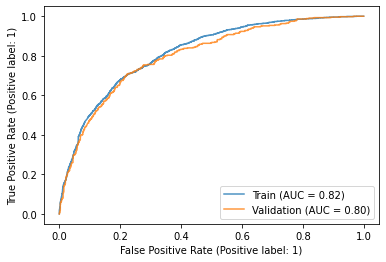

In [45]:
from sklearn.metrics import roc_curve, auc, plot_roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, grid_cv_svc.predict(X_val))
roc_auc = auc(false_positive_rate, true_positive_rate)

print("AUC:",roc_auc_score(y_val, grid_cv_svc.predict_proba(X_val)[:,1]))
ax = plt.gca()
model_disp_train = plot_roc_curve(grid_cv_svc, X_train, y_train, ax=ax, alpha=0.8,name='Train')
model_disp_test = plot_roc_curve(grid_cv_svc, X_val, y_val, ax=ax, alpha=0.8,name='Validation')
plt.show()

The results are not very good at the end of the day.

## Predict on test data

In [46]:
df_test = pd.read_csv('data\test_auto.csv')

We make transformation to our dataset.

In [47]:
def data_for_ml_2(df_test):

    df_test.drop(columns=['TARGET_AMT','TARGET_FLAG'],inplace=True)

    for column_name in ['EDUCATION','MSTATUS','JOB','CAR_TYPE','URBANICITY']:
        df_test[column_name] = df_test.apply(lambda row : remove_z(row,column_name),axis=1)
    del(column_name)

    df_test.replace({'Yes':1,'No':0,'M':1,'F':0,'yes':1,'no':0,'z_F':0},inplace=True)

    df_test['INCOME'] = df_test.apply(lambda row : from_dollar_string_to_float(row,'INCOME'),axis=1)
    df_test['HOME_VAL'] = df_test.apply(lambda row : from_dollar_string_to_float(row,'HOME_VAL'),axis=1)
    df_test['BLUEBOOK'] = df_test.apply(lambda row : from_dollar_string_to_float(row,'BLUEBOOK'),axis=1)
    df_test['OLDCLAIM'] = df_test.apply(lambda row : from_dollar_string_to_float(row,'OLDCLAIM'),axis=1)

    df_for_imputer_test = pd.get_dummies(df_test.drop(columns=['INDEX']),columns=columns_to_dummy)
    df_without_nan_test = pd.DataFrame(imputer.transform(df_for_imputer_test) ,columns=df_for_imputer_test.columns)
    df_clean_test = df_without_nan_test[df.drop(columns=columns_to_dummy+columns_to_drop).columns]
    for column_name in columns_to_dummy :
        df_clean_test[column_name] = df_without_nan_test[df_without_nan_test.columns[np.char.startswith(list(df_without_nan_test.columns),column_name)]].idxmax(axis=1).apply(lambda x : x[len(column_name)+1:])
    
    return df_clean_test

In [48]:
df_clean_test = data_for_ml_2(df_test)
df_clean_test = data_for_ml(df_clean_test)
X_test = scaler.transform(df_clean_test)

We predict

In [53]:
y_test_pred = grid_cv_svc.predict(X_test)
y_test_pred_proba = grid_cv_svc.predict_proba(X_test)

and save in csv

In [58]:
df_test['INDEX']

0           3
1           9
2          10
3          18
4          21
        ...  
2136    10279
2137    10281
2138    10285
2139    10294
2140    10300
Name: INDEX, Length: 2141, dtype: int64

In [61]:
df_pred_test = pd.concat([df_test['INDEX'],pd.DataFrame(y_test_pred,columns=['p_target'],index=df_test.index)],axis=1).rename(columns={'INDEX':'index'})
df_pred_test.to_csv('predictions.csv',index=False)
df_pred_test

,index,p_target
0,3,0
1,9,1
2,10,0
3,18,0
4,21,1
...,...,...
2136,10279,0
2137,10281,0
2138,10285,0
2139,10294,1
